# 推特用户 WeRateDogs (@dog_rates) 数据清洗
WeRateDogs是一个发布狗的评分的推特博主。

目录：
- [收集](#Collect)<br>
- [评估](#Assess)<br>
    - [目测评估](#Visual-Assess)<br>
    - [编程评估](#Program-Assess)<br>
- [清洗](#Clean)<br>
- [其他](#Other)<br>

## <a class="anchor" id="Collect">收集</a>

In [1]:
import numpy as np
import pandas as pd
import requests
import json

收集3个文件  
文件1：推特档案  
文件2：图像预测数据  
文件3：推特额外信息

In [2]:
df_1 = pd.read_csv('twitter_archive_enhanced.csv')
df_1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
url = 'https://static-documents.s3.cn-north-1.amazonaws.com.cn/nd002/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

df_2 = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf8')
df_2.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [4]:
tweet = []

with open('tweet_json.txt', 'r') as file:
	# print(line)
	for line in file.readlines():
		dic = json.loads(line)
		tweet.append(dic)

df_3 = pd.DataFrame.from_dict(tweet)
df_3.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39492,False,False,False,False,en,NaN,NaN,NaN,NaN


## <a class="anchor" id="Assess">评估</a>
### <a class="anchor" id="Visual-Assess">目测评估</a>

In [5]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
df_3

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39492,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33786,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25445,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42863,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41016,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2348,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,309,False,False,False,False,en,NaN,NaN,NaN,NaN
2349,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


### <a class="anchor" id="Program-Assess">编程评估</a>

In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_1['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
df_1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [11]:
df_1['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
df_1[df_1['rating_numerator'] == 1776.0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [14]:
df_1.name.value_counts().sort_index(ascending=False)

very            5
unacceptable    1
this            1
the             8
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 957, dtype: int64

In [15]:
df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
created_at                       2352 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
full_text                        2352 non-null object
truncated                        2352 non-null bool
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
source                           2352 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2352 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [19]:
df_3['lang'].value_counts()

en     2334
und       7
nl        3
in        3
eu        1
et        1
ro        1
tl        1
es        1
Name: lang, dtype: int64

In [20]:
df_3.sample()['entities']

418    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, dtype: object

#### 质量
##### `df_1` 表格 
- 包含转推，重复（duplicate）
- 错误的数据类型：“timestamp”，“retweeted_status_timestamp”列
- “source”列，包含HTML tags
- 存在不是10的分母（“rating_denominator”列）
- “name”列存在“very”，“unacceptable”等不是狗的名字的文本
- 包含没有图片的推特

##### `df_2` 表格
- 错误的数据类型：tweet_id列

##### `df_3` 表格
- geo, coordinates, place, contributors 列的值全部缺失，或者只有一个有效的值

#### 整洁度
- df_1 "doggo"，"floofer"，"pupper"，"puppo"列应该合并为一列
- df_1 df_2 df_3 的数据应该与应该储存在同一个表/文件中

## <a class="anchor" id="Clean">清洗</a>

In [21]:
# 备份三个数据集
df_1_clean = df_1.copy()
df_2_clean = df_2.copy()
df_3_clean = df_3.copy()

#### 包含转推，重复（duplicate）
##### 定义
删掉转推的推文

##### 代码

In [22]:
df_1_clean = df_1_clean.loc[df_1_clean.retweeted_status_id.isnull()]
df_1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

##### 测试

In [23]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### df_1 错误的数据类型：“timestamp”列

##### 定义
“timestamp”列的数据类型转换为datetime

##### 代码

In [24]:
df_1_clean.timestamp = pd.to_datetime(df_1_clean.timestamp)

##### 测试

In [25]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


#### df_1 “source”列，包含HTML tags

##### 定义
清除HTML tags

##### 代码

In [26]:
df_1_clean.source = df_1_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

##### 测试

In [27]:
df_1_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 存在不是10的分母 存在大于10的分子

##### 定义
重新提取分子、分母

##### 代码

In [28]:
# 提取出的分子是带有小数点的，分母是10的倍数（且不等于0）
rating = df_1_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
# 提取出来的结果是个 dataframe 数据集，有两列，分别命名为分子和分母
rating.columns = ['rating_numerator', 'rating_denominator']
# 用新提取的数据替换掉原有的数据。用astype()修改类型
df_1_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
df_1_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

In [29]:
df_1_clean['rating_numerator']  = df_1_clean['rating_numerator'] / df_1_clean['rating_denominator'] *10
df_1_clean['rating_denominator'] = 10

##### 测试

In [30]:
df_1_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [31]:
df_1_clean.rating_numerator.value_counts()

12.00      504
10.00      445
11.00      431
13.00      308
9.00       157
8.00        98
7.00        53
14.00       44
5.00        34
6.00        32
3.00        19
4.00        15
2.00        11
1.00         7
0.00         2
420.00       2
11.26        1
9.50         1
15.00        1
11.27        1
666.00       1
17.00        1
13.50        1
9.75         1
1776.00      1
182.00       1
Name: rating_numerator, dtype: int64

#### “name”列存在“very”，“unacceptable”等不是狗的名字的文本

##### 定义
删除所有小写字母开头的词（因为狗的名字都是大写字母开头）

##### 代码

In [32]:
df_1_clean['name'][df_1_clean['name'].str.match('[a-z]+')] = ''

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


or index in dic.keys():
    print(main_clean.loc[index,"rating_numerator"])

##### 测试

In [33]:
# 先看看有没有名字被删空的行
df_1_clean.name[df_1_clean.name == ''].value_counts()

    104
Name: name, dtype: int64

In [34]:
df_1_clean.name.replace('', np.nan, inplace=True)

In [35]:
df_1_clean.name.value_counts().sort_index(ascending=False)

Zuzu     1
Zooey    1
Zoey     3
Zoe      1
Ziva     1
        ..
Aiden    1
Adele    1
Acro     1
Ace      1
Abby     2
Name: name, Length: 931, dtype: int64

#### df_2 错误的数据类型：tweet_id列

##### 定义
数据类型转换为object

##### 代码

In [36]:
df_2_clean.tweet_id = df_2_clean.tweet_id.astype(object)

##### 测试

In [37]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### df_3 geo, coordinates, place, contributors 列的值全部缺失，或者只有一个有效的值

##### 定义
删掉这些列

##### 代码

In [38]:
df_3_clean.drop(['geo', 'coordinates', 'place', 'contributors'], axis=1, inplace=True)

##### 测试

In [39]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 27 columns):
created_at                       2352 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
full_text                        2352 non-null object
truncated                        2352 non-null bool
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
source                           2352 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2352 non-null object
is_quote_status                  2352 non-null bool
retweet_count                    2352 non-

#### df_1 "doggo"，"floofer"，"pupper"，"puppo"列应该合并为一列

##### 定义
df_1 "doggo"，"floofer"，"pupper"，"puppo"列合并为一列

##### 代码

In [40]:
df_1_clean['status_new'] = df_1_clean.text.str.lower().str.findall('(doggo|pupper|puppo|floofer)')
df_1_clean['status_new'] = df_1_clean['status_new'].apply(lambda x: ','.join(set(x)))

In [41]:
df_1_clean['status_new'] = df_1_clean['status_new'].replace('',np.nan)

##### 测试

In [58]:
df_1_clean.status_new.value_counts()

pupper           250
doggo             82
puppo             31
floofer            9
pupper,doggo       6
doggo,pupper       4
puppo,doggo        2
floofer,doggo      1
Name: status_new, dtype: int64

In [43]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2172 non-null float64
rating_denominator       2175 non-null int64
name                     2071 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
status_new               385 non-null object
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(9)
memory usage: 271.9+ KB


#### df_1 的数据应该与 df_2 df_3 储存在同一个表/文件中

##### 定义
三个表合成一个表

##### 代码

In [61]:
df_3_clean.rename(columns={"id": "tweet_id"}, inplace = True);

In [62]:
df_1_clean.tweet_id = df_1_clean.tweet_id.astype(object)

In [63]:
df_3_clean.tweet_id = df_3_clean.tweet_id.astype(object)

In [64]:
df_1_2_clean = pd.merge(df_1_clean, df_2_clean, on='tweet_id')

In [65]:
df_1_2_3_clean = pd.merge(df_1_2_clean, df_3_clean, on='tweet_id')

##### 测试

In [68]:
df_1_2_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 52 columns):
tweet_id                         1900 non-null object
in_reply_to_status_id_x          74 non-null float64
in_reply_to_user_id_x            74 non-null float64
timestamp                        1900 non-null datetime64[ns, UTC]
source_x                         1900 non-null object
text                             1900 non-null object
expanded_urls                    1845 non-null object
rating_numerator                 1897 non-null float64
rating_denominator               1900 non-null int64
name                             1832 non-null object
doggo                            1900 non-null object
floofer                          1900 non-null object
pupper                           1900 non-null object
puppo                            1900 non-null object
status_new                       384 non-null object
jpg_url                          1900 non-null object
img_num            

## <a class="anchor" id="Other">其他</a>

In [48]:
# 存储清理后的主数据集
df_1_2_3_clean.to_csv('cleaned_data.csv', encoding='utf-8', index=False)

### 数据分析和可视化

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

#### 分析
##### 什么状态的狗平均点赞最多

In [50]:
df_1_2_3_clean['status_new'] = df_1_2_3_clean['status_new'].replace(np.nan, 'None')

In [51]:
print('doggo 平均点赞：', round(df_1_2_3_clean.favorite_count[df_1_2_3_clean.status_new == 'doggo'].mean()))
print('floofer 平均点赞：',round(df_1_2_3_clean.favorite_count[df_1_2_3_clean.status_new == 'floofer'].mean()))
print('pupper 平均点赞：',round(df_1_2_3_clean.favorite_count[df_1_2_3_clean.status_new == 'pupper'].mean()))
print('puppo 平均点赞：',round(df_1_2_3_clean.favorite_count[df_1_2_3_clean.status_new == 'puppo'].mean()))

doggo 平均点赞： 18290
floofer 平均点赞： 13157
pupper 平均点赞： 7009
puppo 平均点赞： 21881


In [52]:
df_1_2_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 52 columns):
tweet_id                         1994 non-null object
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        1994 non-null datetime64[ns, UTC]
source_x                         1994 non-null object
text                             1994 non-null object
expanded_urls                    1994 non-null object
rating_numerator                 1993 non-null float64
rating_denominator               1994 non-null int64
name                             1896 non-null object
doggo                            1994 non-null object
floofer                          1994 non-null object
pupper                           1994 non-null object
puppo                            1994 non-null object
status_new                       1994 non-null object
jpg_url                          1994 non-null object
img_num           

Doggo 的狗平均点赞数最高

##### 狗的评分（分数）的分析

In [53]:
df_1_2_3_clean['rating_numerator'].value_counts().sort_index()

0.00         2
1.00         4
2.00        10
3.00        19
4.00        15
5.00        32
6.00        32
7.00        51
8.00        95
9.00       152
9.75         1
10.00      422
11.00      402
11.26        1
11.27        1
12.00      454
13.00      261
13.50        1
14.00       36
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64

In [54]:
dog_rating_mean = df_1_2_3_clean['rating_numerator'].mean()
dog_rating_mean

11.644144505770194

In [55]:
df_1_2_3_clean['rating_numerator'][df_1_2_3_clean['rating_numerator'] > dog_rating_mean].value_counts().sum()

754

狗评分的平均分为8.622119815668203，有597只狗高于平均分。

##### 推文数量随时间的推移趋势

In [56]:
df_1_2_3_clean['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index(ascending=False)

2017-08      2
2017-07     49
2017-06     44
2017-05     43
2017-04     41
2017-03     48
2017-02     64
2017-01     66
2016-12     54
2016-11     53
2016-10     65
2016-09     63
2016-08     59
2016-07     88
2016-06     81
2016-05     57
2016-04     54
2016-03    120
2016-02    111
2016-01    169
2015-12    367
2015-11    296
Name: timestamp, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='line')` instead of `Series.plot('line',)`.
  


(0, 385.25)

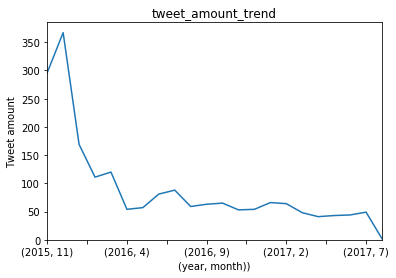

In [57]:
data = df_1_2_3_clean.tweet_id.groupby([df_1_2_3_clean["timestamp"].dt.year, df_1_2_3_clean["timestamp"].dt.month]).count()
plot = data.plot('line', title='tweet_amount_trend')
plot.set_xlabel("(year, month))")
plot.set_ylabel("Tweet amount")
# plot.xticks(x_ticks)
plot.set_ylim(0, )

从2015年11月到2017年7月，推文数量总体呈下降趋势。